[Welcome](Welcome.ipynb)


# Overview of Python World

Python provides several dimensions along which to measure your comprehension of the language.

These dimensions, in order of closest-to-core Python outward, are:

* keywords and punctuation
* ```__builtins__``` (utility belt, lots of types)
* ```__ribs__``` (special names)
* Standard Library: hundreds of modules, importable 
* Ecosystem (3rd Party): a whole universe of goodies

But what does all this have to do with our famous dot notation?

Relax, ```__all__``` will become clear.  Fully comprehending what the dot does requires diving in to Python's [Object Oriented Paradigm](OO_Paradigm.ipynb).

Dot notation comes under the heading of "punctuation" at the top of the list, along with operators such as +, = (assignment), -, * (multiplication) and so on.

The dot is what we sometimes call the "accessor" or the "accessor operator".  In Python, it's associated with the special names (see below) ```__getattr__``` and ```__setattr__```, as well as ```__getattribute__```.  

For contrast, we also get contents from an object using a pair of square brackets, as when retrieving a value from a dict, or an element from a list.  Square bracket syntax is associated with the special names ```__getitem__``` and ```__setitem__```.

###  Numbers & Strings

In [1]:
print(\
"""
Remainder:       {:>5}
Exponentiation:  {:>5}
Bit shift left:  {:>5}
Bit shift right: {:>5}
""".format(
8593 % 48,
2**10,
2<<3,
16>>2))


Remainder:           1
Exponentiation:   1024
Bit shift left:     16
Bit shift right:     4



Customarily, a language is first introduced by its primitive types.  Python has several number types, such as integer, float, decimal and fraction. One could argue that dates and datetime objects are semi-numeric.  Python has those too, as well as a pure time time.

The [string type](Unicode_Fun.ipynb) contains a ```format``` method that fills in placeholders as shown above.  

Four arguments populate or "fill in" the four brace-delimited "blanks", which in this case (above) are right justified within a fixed-width of five wide. ```{:^5}``` would center the arguments, whereas ```{:<5}``` would left-justify.  Try it!

### Keywords & Punctuation

As you approach Planet Python, various meanings resolve, for terms that may have a different spin on other planets.  

Take "keywords" for example.  In Python we have 35 of those, including the newest two: ```async``` and ```awaits```.  

In the currently running version of Python, we're able to find the other 33 in a Standard Library module, ```keyword```, which in turn contains the list ```kwlist```.

In [2]:
import keyword
print("These are the keywords of Python, minus a couple:\n")

for kw in keyword.kwlist[:-1]:  # loop over the keywords and print them
    print(kw, end=", ")         # by default, newline terminates each line
else:
    print(keyword.kwlist[-1])   # the last one should end with no comma
    
print("\nThat's a list of {} keywords".format(len(keyword.kwlist)))

These are the keywords of Python, minus a couple:

False, None, True, and, as, assert, break, class, continue, def, del, elif, else, except, finally, for, from, global, if, import, in, is, lambda, nonlocal, not, or, pass, raise, return, try, while, with, yield

That's a list of 33 keywords


You're starting to see some of these in action, for example ```for```, both above and in our list comprehension syntax (borrowed from Haskell).

### Standard Library

You'll notice use of the keyword ```import``` to reach out to the Standard Library (somewhere along the ```sys.path```) in order to add ```keyword``` to the current namespace.

Inside the module ```keyword``` is a canned list of keywords, most of them, represented as strings.

A goodly number of these keywords control the flow of execution based on whether various expressions evaluate to True or False, the two types of boolean (bool type), and also keywords.  True, False and None are the only keywords to double as actual values.

True and False are synonymous with the integers 1 and 0 in Python, whereas None is synonymous with none but itself.  None is reminiscent of ```void``` in C, and indeed Python inherits a lot of concepts from C.

In [3]:
True * 10 + False + 7

17

In [4]:
isinstance(True, bool) and isinstance(False, bool)

True

In [5]:
isinstance(1, bool)    # the integer 1 is not of the boolean type

False

In [6]:
issubclass(bool, int)  # bool is a subtype of the integer type

True

Types are organized in a "taxonomy" (not the term most used), or a "hierarchy" (used frequently).  This means a type may inherit from parent or ancestor types.  This saves us from needing to duplicate code.

Python is a multi-paradigm language, meaning it includes Object Oriented grammar, but does not enforce it as the only option the way Java does.  For example, you're free to write free-standing functions outside of any class.  The function type is itself a type of object with its own custom syntax build around ```def``` and ```return```.

In [7]:
def fibonacci(n):        # syntax for defining a function
    a, b = 0,1
    for _ in range(n):   # loop n times
        b, a = a + b, b  # parallel or unpacking assignment
    return a

[fibonacci(x) for x in range(10)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

In [8]:
type(fibonacci)

function

### Special Names ( ```__ribs__``` )

<a data-flickr-embed="true"  href="https://www.flickr.com/photos/internetarchivebookimages/14577615327/in/photolist-odb6ai-owt6aT-ousngN-owbdS8-wD4C7L-xBUHNc-t3LxYn-ovbr4b-oyaPpB-yooDvw-w7fA4G-y5Q1xh-xnVUZC-wEZsLh-x7KZoh" title="Image from page 263 of &quot;St. Nicholas [serial]&quot; (1873)"><img src="https://farm6.staticflickr.com/5568/14577615327_8b45a73aaf.jpg" width="500" height="180" alt="Image from page 263 of &quot;St. Nicholas [serial]&quot; (1873)"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

In [9]:
lowercase_elements = [
    element 
    for element in dir(__builtins__)  # no need to import
    if element.islower()
]   # filter out Exceptions, keep special names

lowercase_elements[0:5]  # first five

['__build_class__', '__debug__', '__doc__', '__import__', '__loader__']

Hmph, those are pretty funny looking, what with the double underlines.  I've taken to calling them ```__ribs__``` for short, but more technically they're known as "special names".

So mixed among the builtins -- names you need not import -- are some special names.

Think of them as scaffolding making up the "back stage" and/or "behind the scenes" aspect of Python, a more janitorial layer wherein you support your "play" with somewhat less visible forms of "string pulling".

For example, with ```__lt__```, ```__eq__``` and ```__gt__``` we can control the binary operators <, == and >, when place between two objects.  You'll find a specific example in [this Notebook on Ordering Polyhedrons](OrderingPolys.ipynb).

I'm talking about "string pulling" in the sense of controlling puppets, marionettes more specifically. Your types are a lot like action figures from a box of puppets or avatars (think of the *Toy Story* movies), each enabled with special powers).

### Builtins

The builtins are the contents of ```__builtins__```, which you may think of as a Python module that never needs explicit importing.  

As we saw above, some of what it contains are "special names" (or ```__ribs__```), but those are actually in the minority, under 15% of the total. 

In [10]:
len([bi for bi in dir(__builtins__) 
     if bi.startswith("__") 
     and bi.endswith("__")])

9

```__builtins__``` also contains lots of Exception types, raised when things "go wrong" (mistakes happen).  A lot of them contain the substring "Error" somewhere in their name:

In [11]:
len([bi for bi in dir(__builtins__) 
     if bi.__contains__("Error")])

48

Many are simply lowercase. When we put quotes around these names, they turn into strings, which is what we need for list-wise representation.  The job of ```dir```, one of the builtins, is to return (come back with) a list of its argument's contents.  Think of it as printing the manifest of some shipping container.

In [12]:
lowercase_elements[-5:]  # last five elements in the container

['super', 'tuple', 'type', 'vars', 'zip']

These last few strings do not look like "special names" -- which come earlier in the alphabet.  Indeed they are not.  

Yet these names, like the special names, have primitive powers relating to the language development process itself.  

The builtins provide like a workbench, a set of tools, as if for fixing bicycles (an old UNIX metaphor).  With just the builtins and the keywords, you have everything you need to write Python programs.  However, you will missing having a library, keywords (including additional punctuation) and builtins are all you have.

The function ```dir(obj)``` returns an alphabetized list of the "guts" or "contents" of whatever object, represented as strings.

No string (bounded by quotes) is actually anything but a string. We often use strings for representations of not-string objects. We use the string "horse" to represent the Python name used without quotes in some expression or statement.

### Booleans

Some of the builtin functions work directly with booleans, of which there are only two, both keywords:  True and False.  The ```bool``` type is good at turning inputs into either one of these.  Most expressions evaluate to True.  Only empty collections, such as the empty string, and zero-like numbers evaluate to False.

In [13]:
target_tuple = (True, False, False, False)
print("any:", any(target_tuple))
print("all:", all(target_tuple))
print("bool(''):", bool(''))

any: True
all: False
bool(''): False


### 3rd Party Modules

The Python Imaging Library (PIL) is a good example of a 3rd party module.  The Python 3 compatible version is downloadable from the cloud, via ```conda``` or ```pip```, for example, as [```pillow```](https://pillow.readthedocs.io/).

In [14]:
from PIL import Image  # 3rd Party Package, already installed
horse = Image.open("mr_ed.jpg")
print(horse.format, horse.size, horse.mode)

JPEG (640, 480) RGB


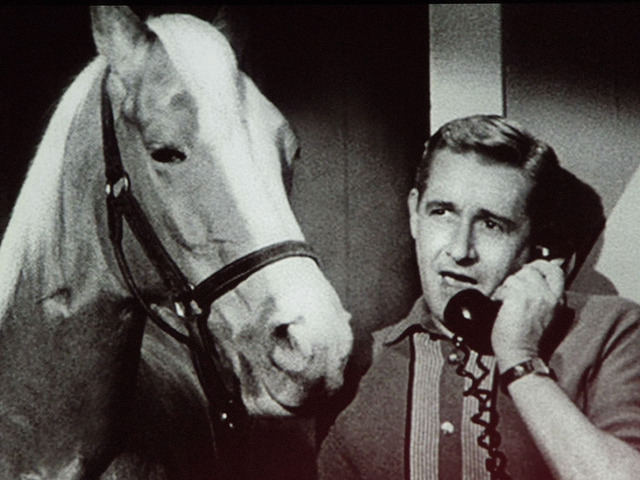

In [15]:
from IPython.display import display
display(horse)

It's when the quotes come off (cite ```eval```) that you have an actual Python name for something.  

Back to digging around in the ```__builtins__``` namespace:

In [16]:
eval("copyright")  # same as "copyright" without the quotes

Copyright (c) 2001-2017 Python Software Foundation.
All Rights Reserved.

Copyright (c) 2000 BeOpen.com.
All Rights Reserved.

Copyright (c) 1995-2001 Corporation for National Research Initiatives.
All Rights Reserved.

Copyright (c) 1991-1995 Stichting Mathematisch Centrum, Amsterdam.
All Rights Reserved.

The ```print()``` function is good about removing quote marks, when strings are printed:

In [17]:
for name in lowercase_elements[-5:]:
    print(name)

super
tuple
type
vars
zip


For example, both ```tuple``` and ```zip``` are Python types.  They both create instances of themselves.  Just like our Dog type is a source of any number of dog instances, so may we populate our world with any number of tuples or zips.  Actually ```type``` is a type as well.

In [18]:
len(lowercase_elements) # how many?

80

Wow!  So many builtins, and that's excluding a lot of capitalized content.

In [19]:
upper_mixed_case_elements = [
    element for element in dir(__builtins__) 
    if not element.islower()]  # all but lowercase names

In [20]:
upper_mixed_case_elements[::5]  # every 5th one

['ArithmeticError',
 'BrokenPipeError',
 'ConnectionError',
 'Ellipsis',
 'FileNotFoundError',
 'ImportError',
 'IsADirectoryError',
 'ModuleNotFoundError',
 'NotImplementedError',
 'ProcessLookupError',
 'RuntimeWarning',
 'SystemError',
 'TypeError',
 'UnicodeTranslateError',
 'ZeroDivisionError']

In [21]:
license

Type license() to see the full license text

In [22]:
# license?

Uncomment the line above to see a way to get some help in a Jupyter Notebook such as this is.

Here's another way of studying Python's history, by means of a [Computer Languages Timeline](https://www.levenez.com/lang/)

Also in the Standard Library, some guidelines and lessons learned:

In [23]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
